In [398]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 9e-04
end_value1 = 1e-04

# particle_diameter_1 = 1e-4
# particle_diameter_2 = 3e-7

start_value2 = 5e-6
end_value2 = 2e-5

column_header =['particle_diameter_1', 'particle_diameter_2']

array1 = np.linspace(start_value1, end_value1, 10)
array2 = np.linspace(start_value2, end_value2, 10)

combinations = list(product(array1, array2))

# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



    particle_diameter_1  particle_diameter_2
0                0.0009             0.000005
1                0.0009             0.000007
2                0.0009             0.000008
3                0.0009             0.000010
4                0.0009             0.000012
..                  ...                  ...
95               0.0001             0.000013
96               0.0001             0.000015
97               0.0001             0.000017
98               0.0001             0.000018
99               0.0001             0.000020

[100 rows x 2 columns]


In [399]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('TT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
# md_df = md_df.drop(503)
# md_df = md_df.drop(502)
# md_df = md_df.drop(501)


# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df.set_index(new_index_column, inplace=True)

print('Modeling Results')
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0.0000,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.0125,7.002988,7.002883,7.002980,7.002973,7.002980,7.003649,7.002980,7.003018,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.0375,7.002902,6.999774,6.987791,6.998702,6.983952,6.997777,6.980619,6.996958,6.977655,6.976285,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.0875,7.002136,6.982293,6.961822,6.975502,6.951476,6.969673,6.942503,6.964523,6.934533,6.930850,...,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978
0.1875,6.998088,6.956187,6.926895,6.941089,6.908006,6.928194,6.891680,6.916847,6.877219,6.870548,...,7.002972,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6875,0.115794,0.109258,0.106722,0.105485,0.104725,0.104517,0.104493,0.104498,0.104516,0.104520,...,2.486000,2.447826,2.425097,2.410032,2.399319,2.391312,2.385102,2.380145,2.376098,2.372730
49.7875,0.115625,0.109165,0.106658,0.105436,0.104685,0.104517,0.104493,0.104498,0.104516,0.104520,...,2.482129,2.444037,2.421357,2.406325,2.395635,2.387646,2.381450,2.376505,2.372466,2.369106
49.8875,0.115458,0.109073,NaN,0.105388,NaN,0.104517,NaN,0.104498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49.9875,0.115293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0.0, 7.5)

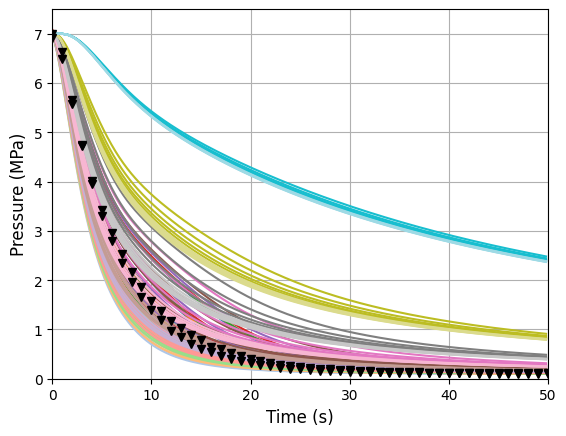

In [400]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
data20 = pd.read_csv('TT1.csv')
# prediction = pd.read_csv('model_pellets_out.csv')
plt.plot(data20['time'], data20['TT1_1000_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_1000_2']/1e6, color = 'k', marker = 'v', linestyle = '')
# plt.plot(prediction['time'], prediction['inlet-p']/1e6, linestyle = '', marker = '.')
# ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 7.5)

In [404]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

RMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 504)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_1000_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    rmse = compute_armse(y_values, experimental_y_values)
    # Append the value to the NumPy array
    ARMSE = np.append(RMSE, rmse) 


parameters = pd.read_csv('combinations.csv')

porosity = 0.036
minimum_ARMSE = min(ARMSE)
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*porosity**3/(1-porosity)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*porosity**3/(1-porosity)
print("K_2 = ", K_2)
print('Minimum RMSE: ' + str(minimum_ARMSE))

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])
print('minimum_index: ', min_index_1)

K_1 =  2.711110345896248e-13
K_2 =  1.3828097213989328e-10
Minimum RMSE: nan
particle_diameter_1 =  0.0009
particle_diameter_2 =  5e-06
minimum_index:  0


In [402]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

RMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 504)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_1000_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    rmse = compute_armse(y_values, experimental_y_values)
    RMSE = np.append(RMSE, rmse) 


parameters = pd.read_csv('combinations.csv')


minimum_RMSE = min(RMSE)
min_index_2 = np.argmin(RMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*porosity**3/(1-porosity)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*porosity**3/(1-porosity)
print("K_2 = ", K_2)
print('Minimum RMSE: ' + str(minimum_RMSE))

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])
print(min_index_2)

K_1 =  2.711110345896248e-13
K_2 =  1.3828097213989328e-10
Minimum RMSE: 0.46866736310779683
particle_diameter_1 =  0.0009
particle_diameter_2 =  5e-06
1


In [403]:
# Plot all pressure decays
darcy_1 = pd.read_csv('model_pellets_1.csv')
# darcy_2 = pd.read_csv('model_pellets_2.csv')
md_df[min_index_1].plot(marker = '.', color = 'C0', label = 'Darcy + Forchheimer' )
# md_df[min_index_2].plot(marker = '.', color = 'C2', label = 'Darcy + Forchheimer')
plt.plot(darcy_1['time'], darcy_1['inlet-p']/1e6, color = 'C0', linestyle = '--', label = 'Darcy')
# plt.plot(darcy_2['time'], darcy_2['inlet-p']/1e6, color = 'C2', linestyle = '--', label = 'Darcy')
# plt.plot(data20['time'], data20['TT1_1000_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_1000_2']/1e6, color = 'k', marker = 'v', linestyle = '', label ='Experimental Data')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.legend()
plt.xlim(0.4, 50)
plt.ylim(0, 7.5)



FileNotFoundError: [Errno 2] No such file or directory: 'model_pellets_1.csv'